In [1]:
from random import random, uniform
from matplotlib import pyplot as plt
import numpy as np
import math

итерироваться по линии

In [2]:
def points_to_line(x1, y1, x2, y2):
    if x1 != x2:
        k = (y2-y1)/(x2-x1)
        b = y1-k*x1
    return k, b

def intersect_line_map(k, b, n=10, n_line=100):
    eps = 0.000001
    map_2d_now = np.zeros((n, n))
    '''
    if k>0:
        mini = -b/k
        maxi = (n - b)/k
    elif k<0:
        mini = (n - b)/k
        maxi = -b/k
    '''
    mini=0
    maxi=n
    x_iter = np.linspace(max(0, mini), min(maxi, n) - eps, n_line)
    for x_n in x_iter:
        y_n = k*x_n+b
        if 0 <= y_n < n:
            i, j = math.floor(x_n), math.floor(y_n)
            map_2d_now[i][j] = 1
    return map_2d_now



In [13]:
def make_2d_map(n=10, n_line=100, num_lines=100):
    '''
    Генерируем 2 случайные точки внутри квадрата
    '''
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        x1, y1, x2, y2 = uniform(0, n), uniform(0, n), uniform(0, n), uniform(0, n)
        k, b = points_to_line(x1, y1, x2, y2)
        map_2d += intersect_line_map(k, b, n, n_line)
    print("std is ", np.std(map_2d))
    return map_2d/map_2d.sum()


def make_2d_map_2(n=10, n_line=100, num_lines=100):
    '''
    Генерируем угол + 1 точку внутри квадрата
    '''
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        alpha = uniform(0, 2*np.pi)
        k = math.tan(alpha)
        x1, y1 = uniform(0, n), uniform(0, n)
        b = y1 - k*x1
        map_2d += intersect_line_map(k, b, n, n_line)
    print("std is ", np.std(map_2d))
    return map_2d/map_2d.sum()

def make_2d_map_3(n=10, n_line=100, num_lines=100):
    '''
    Генерируем угол + 1 точку внутри квадрата (-n, 2n)
    '''
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        alpha = uniform(0, 360)
        k = math.tan(math.radians(alpha))
        x1, y1 = uniform(-n, 2*n), uniform(-n, 2*n)
        b = y1 - k*x1
        map_2d += intersect_line_map(k, b, n, n_line)
    print("std is ", np.std(map_2d))
    return map_2d/map_2d.sum()


def make_2d_map_4(n=10, n_line=100, num_lines=100):
    '''
    Генерируем 2 случайные точки внутри квадрата (-n, 2n)
    '''
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        x1, y1, x2, y2 = uniform(-n, 2*n), uniform(-n, 2*n), uniform(-n, 2*n), uniform(-n, 2*n)
        k, b = points_to_line(x1, y1, x2, y2)
        map_2d += intersect_line_map(k, b, n, n_line)
    print("std is ", np.std(map_2d))
    return map_2d/map_2d.sum()

def make_2d_map_5(n=10, n_line=100, num_lines=100):
    '''
    Генерируем угол и сдвиг
    '''
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        k = np.tan(uniform(0, 2*np.pi))
        if k >= 0:
            b = uniform(-k*n, n)
        else:
            b = uniform(0, n-k*n)
        map_2d += intersect_line_map(k, b, n, n_line)
    print("std is ", np.std(map_2d)/map_2d.sum())
    return map_2d/map_2d.sum()

def take_d_from_map_5(n=10, n_line=100, num_lines=100):
    map_2d = np.zeros((n, n))
    for i in range(num_lines):
        k = np.tan(uniform(0, 2*np.pi))
        if k >= 0:
            b = uniform(-k*n, n)
        else:
            b = uniform(0, n-k*n)
        map_2d += intersect_line_map(k, b, n, n_line)
    return np.std(map_2d)/map_2d.sum()

In [10]:
make_2d_map_5(n=100, n_line=100, num_lines=1000)

std is  4.561146395786453e-05


array([[1.47077363e-04, 1.05055259e-04, 2.31121570e-04, ...,
        1.05055259e-04, 8.40442073e-05, 8.40442073e-05],
       [1.26066311e-04, 1.47077363e-04, 2.52132622e-04, ...,
        6.30331554e-05, 4.20221036e-05, 8.40442073e-05],
       [6.30331554e-05, 1.68088415e-04, 1.68088415e-04, ...,
        8.40442073e-05, 8.40442073e-05, 6.30331554e-05],
       ...,
       [1.89099466e-04, 8.40442073e-05, 6.30331554e-05, ...,
        4.20221036e-05, 1.68088415e-04, 1.05055259e-04],
       [1.05055259e-04, 1.05055259e-04, 8.40442073e-05, ...,
        1.26066311e-04, 1.68088415e-04, 1.26066311e-04],
       [4.20221036e-05, 8.40442073e-05, 1.05055259e-04, ...,
        8.40442073e-05, 1.68088415e-04, 1.26066311e-04]])

In [11]:
make_2d_map_5(n=100, n_line=1000, num_lines=10000)

std is  1.0327680228089259e-05


array([[9.82990979e-05, 1.16866705e-04, 1.02667947e-04, ...,
        1.10313432e-04, 9.28380369e-05, 9.50224613e-05],
       [9.06536125e-05, 1.04852371e-04, 1.08129008e-04, ...,
        9.93913101e-05, 9.82990979e-05, 1.11405644e-04],
       [9.17458247e-05, 1.05944583e-04, 1.17958918e-04, ...,
        1.08129008e-04, 9.82990979e-05, 9.17458247e-05],
       ...,
       [9.28380369e-05, 1.04852371e-04, 9.06536125e-05, ...,
        1.14682281e-04, 9.39302491e-05, 1.02667947e-04],
       [1.13590069e-04, 1.03760159e-04, 8.62847637e-05, ...,
        1.10313432e-04, 1.02667947e-04, 9.72068857e-05],
       [1.14682281e-04, 1.19051130e-04, 8.62847637e-05, ...,
        1.03760159e-04, 9.06536125e-05, 9.61146735e-05]])

In [12]:
make_2d_map_5(n=100, n_line=1000, num_lines=100000)

std is  3.3447830934247105e-06


array([[9.86776652e-05, 9.86776652e-05, 9.32736310e-05, ...,
        1.01163521e-04, 9.52190833e-05, 9.80291811e-05],
       [9.91099880e-05, 1.04405942e-04, 1.00839279e-04, ...,
        9.71645357e-05, 9.93261494e-05, 9.77049391e-05],
       [9.24089855e-05, 9.69483743e-05, 9.66241322e-05, ...,
        9.99746335e-05, 9.96503914e-05, 1.01595844e-04],
       ...,
       [1.03325135e-04, 1.07540281e-04, 1.01920086e-04, ...,
        9.90019073e-05, 9.73806970e-05, 9.68402936e-05],
       [1.04622103e-04, 1.04405942e-04, 9.81372618e-05, ...,
        9.94342300e-05, 9.25170662e-05, 9.34897924e-05],
       [1.01595844e-04, 1.01379682e-04, 9.72726163e-05, ...,
        9.93261494e-05, 9.32736310e-05, 9.29493889e-05]])

In [15]:
from tqdm import tqdm

In [19]:
stds = []
for i in tqdm(range(1000, 100001, 5000)):
    stds.append(take_d_from_map_5(n=100, n_line=1000, num_lines=i))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [14:13<00:00, 42.67s/it]


In [38]:
stds_small = []
for i in tqdm(range(100, 25000, 2000)):
    stds_small.append(take_d_from_map_5(n=100, n_line=1000, num_lines=i))

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [02:21<00:00, 10.89s/it]


In [44]:
stds_small_small = []
for i in tqdm(range(100, 3000, 100)):
    stds_small_small.append(take_d_from_map_5(n=100, n_line=1000, num_lines=i))

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:42<00:00,  1.46s/it]


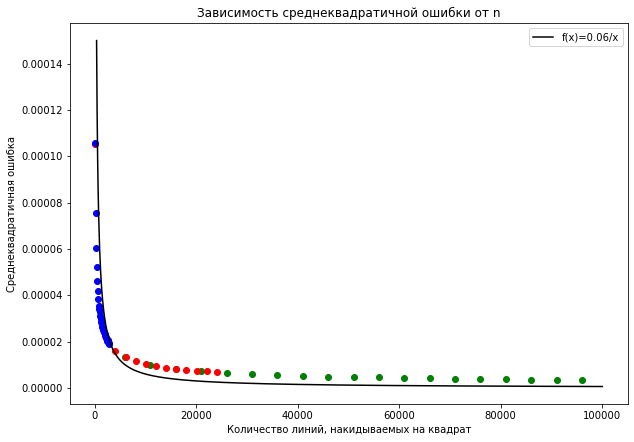

In [77]:
plt.figure(figsize=(10, 7))
x = np.array(range(400, 100001, 100))
plt.plot(range(1000, 100001, 5000), stds, 'bo', color='green')
plt.plot(range(100, 25000, 2000), stds_small, 'bo', color='red')
plt.plot(range(100, 3000, 100), stds_small_small, 'bo', color='blue')
plt.plot(x, 0.06/x, color='black', label='f(x)=0.06/x')

plt.xlabel('Количество линий, накидываемых на квадрат')
plt.ylabel('Среднеквадратичная ошибка')
plt.title('Зависимость среднеквадратичной ошибки от n')
plt.legend()
plt.savefig('квадрат_ошибка.jpg')
plt.show()
#loglog по осям (надежда на прямые)

In [18]:
take_d_from_map_5(n=100, n_line=i//10, num_lines=i)

[4.531421898221315e-05,
 1.355210344814043e-05,
 9.786027192545972e-06,
 8.334582681299017e-06,
 6.926236687348788e-06,
 6.2749367435945585e-06,
 5.66593373343986e-06,
 5.344774763449204e-06]

In [4]:
%%time
plt.imshow(make_2d_map(n=100, n_line=1000, num_lines=100000))
plt.colorbar()
plt.show()

KeyboardInterrupt: 

In [5]:
%%time
plt.imshow(make_2d_map(n=100, n_line=1000, num_lines=1000000))
plt.colorbar()
plt.show()

KeyboardInterrupt: 

std is  1.0386738922399915e-05


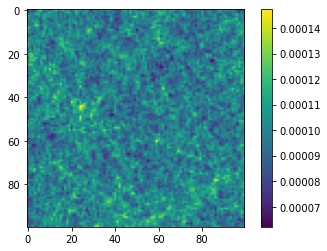

Wall time: 11.4 s


In [78]:
%%time
plt.imshow(make_2d_map_5(n=100, n_line=1000, num_lines=10000))
plt.colorbar()
plt.show()

In [ ]:
%%time
plt.imshow(make_2d_map_2(n=100, n_line=1000, num_lines=1000000))
plt.colorbar()
plt.show()

In [ ]:
%%time
plt.imshow(make_2d_map_3(n=100, n_line=1000, num_lines=100000))
plt.colorbar()
plt.show()

In [ ]:
%%time
plt.imshow(make_2d_map_3(n=100, n_line=1000, num_lines=1000000))
plt.colorbar()
plt.show()

In [ ]:
%%time
plt.imshow(make_2d_map_4(n=100, n_line=1000, num_lines=100000))

In [ ]:
%%time
plt.imshow(make_2d_map_4(n=100, n_line=1000, num_lines=1000000))

In [ ]:
%%time
plt.imshow(make_2d_map_5(n=100, n_line=1000, num_lines=100000))
plt.colorbar()
plt.show()

In [ ]:
%%time
plt.imshow(make_2d_map_5(n=100, n_line=1000, num_lines=1000000))
plt.colorbar()
plt.show()